In [1]:
import pandas as pd
import numpy as np

# Обработка данных

## Загрузка данных

In [23]:
train_df = pd.read_csv('data/train.csv', delimiter=',')
# cntrbtrs = pd.read_csv('data/cntrbtrs.csv', delimiter=';')
# trnsctns = pd.read_csv('data/trnsctns.csv', delimiter=';')

In [3]:
from IPython.display import display

display(train_df.head(7).T)
# display(trnsctns.head(7))
# display(cntrbtrs.head(7))

,0,1,2,3,4,5,6
slctn_nmbr,1,0,2,0,0,1,0
client_id,0xA095932790098744A2325A8D152C05C7,0xF75BAA20A603A2479005DEB80464336E,0x0D18081E0556AF4F95A931FBA4159D52,0x0AD72BC5475D9A4D83E12350A84F839D,0x73DF06339CC25840838408BAD52BE223,0x092BC8229C2770459A87E35C754892E0,0x4768BFF110D93941963C2379F667A77E
npo_account_id,0xD4DBBAC6561929409BA45725A220613E,0x3DCFF11974B3D8458CE3569DE9E855D5,0x9DADF88CB3407C4E89403315F640393E,0xF59C4E62F115684899EAE9B5D5ECF70F,0x35BFFA05321C014B9FC29A189E89EDF0,0x55B01C14C2640948A54F2F3A0FB715A1,0x36C2EC983556E443817033C4032D7BA8
npo_accnts_nmbr,1,2,1,1,2,1,1
pmnts_type,2,2,1,1,2,2,2
year,2017,2009,2010,2005,2007,2007,2004
quarter,2017Q4,2009Q1,2010Q1,2005Q4,2007Q4,2007Q3,2004Q4
gender,1,1,1,-1,1,-1,-1
age,48,35,47,42,42,50,29
clnt_cprtn_time_d,8091,3303,1163,47,876,3536,2031


## Просмотр данных

In [4]:
display(train_df.info())
# display(trnsctns.info())
# display(cntrbtrs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3589918 entries, 0 to 3589917
Data columns (total 42 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   slctn_nmbr              int64  
 1   client_id               object 
 2   npo_account_id          object 
 3   npo_accnts_nmbr         int64  
 4   pmnts_type              int64  
 5   year                    int64  
 6   quarter                 object 
 7   gender                  int64  
 8   age                     int64  
 9   clnt_cprtn_time_d       int64  
 10  actv_prd_d              int64  
 11  lst_pmnt_rcnc_d         int64  
 12  balance                 float64
 13  oprtn_sum_per_qrtr      float64
 14  oprtn_sum_per_year      float64
 15  frst_pmnt_date          object 
 16  lst_pmnt_date_per_qrtr  object 
 17  frst_pmnt               float64
 18  lst_pmnt                float64
 19  pmnts_sum               float64
 20  pmnts_nmbr              int64  
 21  pmnts_sum_per_qrtr      float64

None

## Обработка пропущенных данных

### Train.csv

Пустые столбцы:
- frst_pmnt_date
- lst_pmnt_date_per_qrtr
- postal_code
- region

In [25]:
train_df.loc[train_df['actv_prd_d'] == 0]

,slctn_nmbr,client_id,npo_account_id,npo_accnts_nmbr,pmnts_type,year,quarter,gender,age,clnt_cprtn_time_d,...,lk,assignee_npo,assignee_ops,postal_code,region,citizen,fact_addrss,appl_mrkr,evry_qrtr_pmnt,churn
0,1,0xA095932790098744A2325A8D152C05C7,0xD4DBBAC6561929409BA45725A220613E,1,2,2017,2017Q4,1,48,8091,...,-1,-1,-1,446254.0,САМАРСКАЯ ОБЛ,-1,-1,0,0,0
3,0,0x0AD72BC5475D9A4D83E12350A84F839D,0xF59C4E62F115684899EAE9B5D5ECF70F,1,1,2005,2005Q4,-1,42,47,...,-1,-1,-1,620034.0,СВЕРДЛОВСКАЯ ОБЛ,1,1,0,1,0
5,1,0x092BC8229C2770459A87E35C754892E0,0x55B01C14C2640948A54F2F3A0FB715A1,1,2,2007,2007Q3,-1,50,3536,...,-1,-1,-1,603093.0,НИЖЕГОРОДСКАЯ ОБЛ,1,-1,0,0,0
6,0,0x4768BFF110D93941963C2379F667A77E,0x36C2EC983556E443817033C4032D7BA8,1,2,2004,2004Q4,-1,29,2031,...,-1,-1,-1,398041.0,ЛИПЕЦКАЯ ОБЛ,1,1,0,0,0
14,2,0x2476F0F102543147B000A73BA0A4D11B,0x4EA96F95093551428215F7AB1A155D26,1,2,2012,2012Q4,-1,27,3112,...,-1,-1,-1,162604.0,ВОЛОГОДСКАЯ ОБЛ,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3589885,0,0xE8C862710ECC3E498A37911BC3AF6C48,0x5C2BE1FA8C4CB746BB538F670A2524D2,1,3,2021,2021Q4,-1,52,857,...,-1,-1,-1,410003.0,САРАТОВСКАЯ ОБЛ,1,1,0,0,0
3589894,2,0x3C053384CDC0AD4692E18DC97E8034F3,0xE52E059F46CEC34DBB71DD2A3D6322D1,1,2,2014,2014Q4,-1,40,4966,...,-1,-1,-1,162600.0,ВОЛОГОДСКАЯ ОБЛ,1,-1,0,0,0
3589910,2,0x36D7873374F8EF4B9992E46AD2CA438C,0x06B8AE5D9CDB8149B90237DDA02672B4,1,2,2007,2007Q4,1,31,1616,...,-1,-1,-1,162612.0,ВОЛОГОДСКАЯ ОБЛ,1,1,0,0,0
3589916,1,0xF7C3ABC2295CC140A3B7EA53CB9B39DF,0xBB31CAEA5AF97C418942F2B68341D992,1,2,1999,1999Q1,-1,41,611,...,-1,-1,-1,249130.0,КАЛУЖСКАЯ ОБЛ,-1,-1,0,0,0


Удалим все строчки где нет региона и почтового индекса

In [26]:
train_df.loc[train_df['region'].isnull() & train_df['postal_code'].isnull()]

,slctn_nmbr,client_id,npo_account_id,npo_accnts_nmbr,pmnts_type,year,quarter,gender,age,clnt_cprtn_time_d,...,lk,assignee_npo,assignee_ops,postal_code,region,citizen,fact_addrss,appl_mrkr,evry_qrtr_pmnt,churn
179,0,0xCDC5031E97872845A7B84E4A672CB6D7,0x844F25196F78134B9B32E06D6C377E87,1,1,2010,2010Q3,1,58,3734,...,-1,-1,-1,NaN,NaN,-1,-1,0,1,0
301,0,0x4CCF461FFCED7948BCFCA3D0E6631F4B,0x105D7DF015BFE540B0B044BA1C25A0C2,1,2,2006,2006Q3,1,55,2669,...,-1,-1,-1,NaN,NaN,-1,-1,0,1,0
349,0,0x3BD5BA047DC4F94E95B926564D190955,0xA343B4FD6667E546BF177B4D8B467994,1,2,2005,2005Q1,1,27,1940,...,-1,-1,-1,NaN,NaN,-1,-1,0,1,0
356,0,0x18A67B35EA569842A696521BBBEA7CFB,0x6815EF1CAB03E44DB6A7ECD8F65729C1,1,2,2004,2004Q4,1,30,1510,...,-1,-1,-1,NaN,NaN,-1,-1,0,1,1
430,0,0x5A6212B18810D149A6E5C5144B072B4C,0xE8FAF77410253C4FA0252094E715C86A,1,2,2005,2005Q1,1,60,2121,...,-1,-1,-1,NaN,NaN,-1,-1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3589776,0,0x3DE079B701B81446AD526ED5588E8C5E,0x78A368D5F15CF0429323301278421A06,1,2,2007,2007Q4,1,25,603,...,-1,-1,-1,NaN,NaN,-1,-1,0,1,0
3589833,0,0x36076AED75A7BE4488952CD1FDCAD4E9,0xE7EE453F97C576479605993AEEF8558E,2,2,2005,2005Q1,1,55,2100,...,-1,-1,-1,NaN,NaN,-1,-1,0,1,0
3589855,0,0xD9C0B98EAC90434C809BF7FCCAE6D0B1,0x522F0039600CEE44B5FB0C47E3436AE0,1,2,2007,2007Q4,1,29,721,...,-1,-1,-1,NaN,NaN,-1,-1,0,1,1
3589861,0,0x629D926F2F0BE146B6CF85E76DF99B67,0x5705A6AB4E5FCE46872A9B7BA54A0726,2,2,2005,2005Q1,-1,57,2100,...,-1,-1,-1,NaN,NaN,-1,-1,0,1,1


In [27]:
inds = train_df.loc[train_df['region'].isnull() & train_df['postal_code'].isnull()].index
train_df = train_df.drop(index=inds)

In [28]:
train_df.loc[train_df['postal_code'] == 0]

,slctn_nmbr,client_id,npo_account_id,npo_accnts_nmbr,pmnts_type,year,quarter,gender,age,clnt_cprtn_time_d,...,lk,assignee_npo,assignee_ops,postal_code,region,citizen,fact_addrss,appl_mrkr,evry_qrtr_pmnt,churn
41,1,0xD6BB7D1CE90B704084220E02EF43C0EB,0xD4A8542016584244ACD51BDB7539BBDD,1,2,2013,2013Q1,1,46,5459,...,-1,-1,-1,0.0,МАРИЙ ЭЛ РЕСП,-1,-1,0,0,0
67,1,0xD6862A5BA23B3C448914A3A1F78696E4,0x6B533E7370098441BA8F2FAAE5BB6F16,1,2,2000,2000Q4,-1,49,1321,...,-1,-1,-1,0.0,КРАСНОДАРСКИЙ КРАЙ,1,-1,0,0,0
159,1,0xCC7AA428C09DFE489587D2512A49D68D,0xEA4AB771C1CC854BB4792B85E6422F05,1,2,2020,2020Q4,-1,60,8488,...,-1,-1,-1,0.0,ЛЕНИНГРАДСКАЯ ОБЛ,1,-1,0,0,0
175,1,0x69CDEA2807EACA418D8DC65A8A29869D,0x665EEE7F962E5E4BB8AB05DB270782CA,1,2,2002,2002Q2,-1,38,1651,...,-1,-1,-1,0.0,БЕЛГОРОДСКАЯ ОБЛ,-1,-1,0,0,0
225,1,0xF091AE80D5724F4EAFC9D4C63BF4B322,0xA5871F2706464444B16E97689C9D7A58,1,2,2002,2002Q2,-1,100,1739,...,-1,-1,-1,0.0,КАРЕЛИЯ РЕСП,1,-1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3589600,1,0xE6FA0962E96D5744AF671BF461B3D8BA,0xFC65139425E8C34C8FC4922BEAD0AE28,1,2,2001,2001Q3,1,91,1411,...,-1,-1,-1,0.0,ЛЕНИНГРАДСКАЯ ОБЛ,1,-1,0,0,0
3589686,1,0x3168199986605345AB5E5B3A5AAE4538,0xC8383D11975B7D48A43AFB98027B33C3,1,2,1999,1999Q2,1,29,351,...,-1,-1,-1,0.0,УДМУРТСКАЯ РЕСП,1,-1,0,0,0
3589694,1,0xF876749CA85E784DB1FEB631049D675D,0xBA2FAF9445C4BF4EAE03E0D5981CD208,1,2,1999,1999Q3,1,61,570,...,-1,-1,-1,0.0,ПСКОВСКАЯ ОБЛ,-1,-1,0,0,0
3589695,1,0xEDE6A8D5B10409459C5CF64D6B180B98,0xB6E4A15666A702428C48E99DD033D9BC,1,2,2012,2012Q1,1,45,5235,...,-1,-1,-1,0.0,ТОМСКАЯ ОБЛ,-1,-1,0,0,0


In [29]:
train_df.loc[(train_df['postal_code'] < 100000) & (0 < train_df['postal_code']) & train_df['region'].notna()]

,slctn_nmbr,client_id,npo_account_id,npo_accnts_nmbr,pmnts_type,year,quarter,gender,age,clnt_cprtn_time_d,...,lk,assignee_npo,assignee_ops,postal_code,region,citizen,fact_addrss,appl_mrkr,evry_qrtr_pmnt,churn
8902,2,0x6046E45BF0AD144BA9FCFABB9C0047A2,0xFDC622E2D8994546B61DB7B0A3929DFC,1,2,2014,2014Q4,-1,54,2928,...,-1,-1,-1,60650.0,НИЖЕГОРОДСКАЯ ОБЛ,1,1,0,0,0
10159,1,0x78FE282A1EF165448C99B2C450C70565,0xB596A1DCD34D084C8314D3B8E4CB376B,1,2,2000,2000Q1,1,42,977,...,-1,-1,-1,42990.0,ЧУВАШСКАЯ РЕСПУБЛИКА - ЧУВАШИЯ,1,-1,0,0,0
14102,0,0x545C6EA56747F948BD6D0AD0428409C8,0xEACFE6904185324891772A2BD6E7B937,1,2,2014,2014Q4,1,59,2535,...,-1,-1,-1,70803.0,"КАЗАХСТАН, ВОСТОЧНО-КАЗАХСТАНСКАЯ ОБЛ",1,1,0,0,0
21565,2,0x303CA3350527204990B40FD2527617D6,0xEB9B1B64C594BD449BB8EFC20A137C0F,1,2,2012,2012Q4,-1,45,2225,...,-1,-1,-1,38445.0,КЕМЕРОВСКАЯ ОБЛАСТЬ - КУЗБАСС,1,1,0,0,0
29101,1,0xE3E7957AB912E1408574D21D113D8250,0x649FF58DE700394084D011103B7486AA,1,2,2002,2002Q3,1,43,1895,...,-1,-1,-1,10416.0,АСТРАХАНСКАЯ ОБЛ,1,-1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3573483,1,0xE3E7957AB912E1408574D21D113D8250,0x649FF58DE700394084D011103B7486AA,1,2,2017,2017Q4,1,58,7466,...,-1,-1,-1,10416.0,АСТРАХАНСКАЯ ОБЛ,1,-1,0,0,0
3577420,0,0x45D8D608FD45C9469BA39AEF5AE8DA14,0x1A1E4CD44FDFE742809A3F9B6F6D676A,3,1,2022,2022Q1,1,64,1522,...,1,-1,-1,44200.0,САМАРСКАЯ ОБЛ,1,1,0,1,0
3581003,1,0xE3E7957AB912E1408574D21D113D8250,0x649FF58DE700394084D011103B7486AA,1,2,2018,2018Q4,1,59,7831,...,-1,-1,-1,10416.0,АСТРАХАНСКАЯ ОБЛ,1,-1,0,0,0
3588050,0,0x545C6EA56747F948BD6D0AD0428409C8,0xEACFE6904185324891772A2BD6E7B937,1,2,2010,2010Q4,1,55,1074,...,-1,-1,-1,70803.0,"КАЗАХСТАН, ВОСТОЧНО-КАЗАХСТАНСКАЯ ОБЛ",1,1,0,0,0


Вычислим регионы по почтовым индексам

In [30]:
buffer = train_df.loc[train_df['region'].notna() & train_df['postal_code'].notna() & train_df['postal_code'] > 0]
dict_ = {str(code)[-3:]: region for (region, code) in zip(buffer['region'], buffer['postal_code'])}

buffer = train_df.loc[train_df['region'].isna() & train_df['postal_code'].notna()]

In [31]:
dict_["0"] = np.NAN
list_ = []

for i, row in buffer.iterrows():
    code = str(row['postal_code'])[-3:]
    list_.append(dict_[code])

train_df.loc[train_df.loc[:, 'region'].isna() & train_df.loc[:, 'postal_code'].notna(), 'region'] = pd.Series(list_)

In [32]:
train_df.loc[train_df['region'].isnull()]

,slctn_nmbr,client_id,npo_account_id,npo_accnts_nmbr,pmnts_type,year,quarter,gender,age,clnt_cprtn_time_d,...,lk,assignee_npo,assignee_ops,postal_code,region,citizen,fact_addrss,appl_mrkr,evry_qrtr_pmnt,churn
75428,1,0x373053C88E602F47BAE653F561141E5D,0x1D55928834E51C48B637BEB1DDF8A40D,1,2,2019,2019Q4,1,46,736,...,1,-1,-1,603006.0,NaN,1,1,0,0,0
75525,0,0x07678B77E1E68148AB4F0C7D01289E0E,0x13E946861302524B9260707F56DDC96E,2,1,2018,2018Q4,1,54,1016,...,-1,-1,-1,452687.0,NaN,1,1,0,1,0
75546,0,0x66EF4432D6391F4D9559C2118D0E4C66,0x4DD9F18874C6DA49A9E4943838F68A3D,2,1,2022,2022Q1,1,63,2171,...,1,-1,-1,450064.0,NaN,1,1,0,1,0
75632,0,0x88183724BCEEBC428B1B0EFC67496A08,0xD0E57C7C59FA3641996730B4C0E61FBD,1,3,2015,2015Q1,-1,45,142,...,1,-1,-1,127486.0,NaN,-1,1,0,1,0
75696,0,0x4E04008A25CAE24186B7E8AA14EF7DC0,0x7163103347450247997951EC87077D0D,4,1,2012,2012Q2,-1,51,464,...,1,-1,-1,693014.0,NaN,-1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3589559,1,0x15E15D7048A4574CA367A3EF7B5D4A07,0xD1A64317482F0340BEDF099C4F7785E2,1,2,2011,2011Q1,1,37,688,...,-1,-1,-1,620026.0,NaN,1,1,0,0,0
3589758,1,0x9FB33FB9D2D66648AFBD1C77A3450DB8,0x2E57604165F3634DAEBAE0A0B7749384,1,2,2018,2018Q2,-1,40,262,...,1,-1,-1,169607.0,NaN,1,1,0,0,0
3589806,0,0x1F1B9B65362CB544BA709AAB9FB76DD1,0xA58DDA9C20DB4C49BA8AE82CAD53DD4A,1,1,2017,2017Q4,1,58,235,...,-1,-1,-1,452684.0,NaN,1,1,0,1,0
3589866,0,0x5D967965E5B20A42B319A01769D1F5CE,0xD6F0FF7F5CA260418E4AEB105F9F1670,1,1,2008,2008Q4,1,45,351,...,-1,-1,-1,169712.0,NaN,1,1,0,1,0


Проверяем пустые строки

In [37]:
for col in train_df.columns:
    if len(train_df.loc[train_df[col].isna()]) != 0:
        print(col, len(train_df.loc[train_df[col].isna()]))

In [36]:
train_df['region'].fillna('Неизвестен', inplace=True)

### Удаляем лишние столбцы
- slctn_nmbr
- client_id
- npo_account_id
- year
- frst_pmnt_date
- lst_pmnt_date_per_qrtr
- pmnts_sum_per_year
- pmnts_nmbr_per_year
- incm_per_year
- phone_number
- email
- postal_code

In [34]:
train_df.drop(columns=[
    'postal_code',
    'slctn_nmbr',
    'client_id',
    'npo_account_id',
    'year',
    'frst_pmnt_date',
    'lst_pmnt_date_per_qrtr',
    'oprtn_sum_per_year',
    'pmnts_sum_per_year',
    'pmnts_nmbr_per_year',
    'incm_per_year',
    'phone_number',
    'email',
    'clnt_cprtn_time_d' # мб вернем пупсик
], inplace=True)

In [38]:
len(train_df.columns.to_list())

28

## Графики

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Берем столбцы по типу данных

In [41]:
int_cols = train_df.select_dtypes(int).columns.to_list()
float_cols = train_df.select_dtypes(float).columns.to_list()
cat_cols = train_df.select_dtypes(object).columns.to_list()
display(int_cols, float_cols, cat_cols)

['npo_accnts_nmbr',
 'pmnts_type',
 'gender',
 'age',
 'actv_prd_d',
 'lst_pmnt_rcnc_d',
 'pmnts_nmbr',
 'pmnts_nmbr_per_qrtr',
 'lk',
 'assignee_npo',
 'assignee_ops',
 'citizen',
 'fact_addrss',
 'appl_mrkr',
 'evry_qrtr_pmnt',
 'churn']

['balance',
 'oprtn_sum_per_qrtr',
 'frst_pmnt',
 'lst_pmnt',
 'pmnts_sum',
 'pmnts_sum_per_qrtr',
 'incm_sum',
 'incm_per_qrtr',
 'mgd_accum_period',
 'mgd_payment_period']

['quarter', 'region']

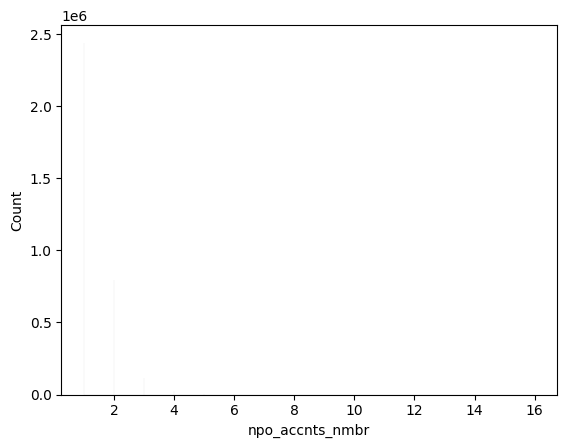

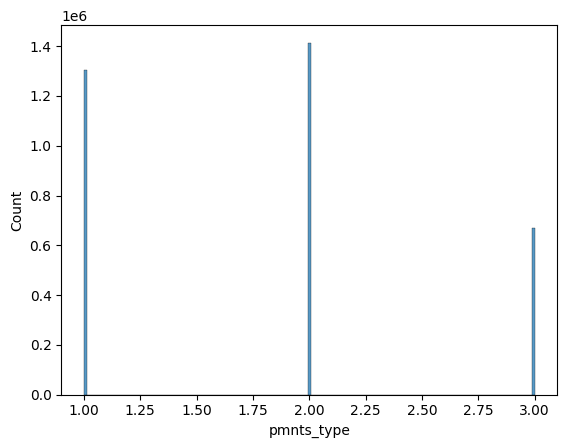

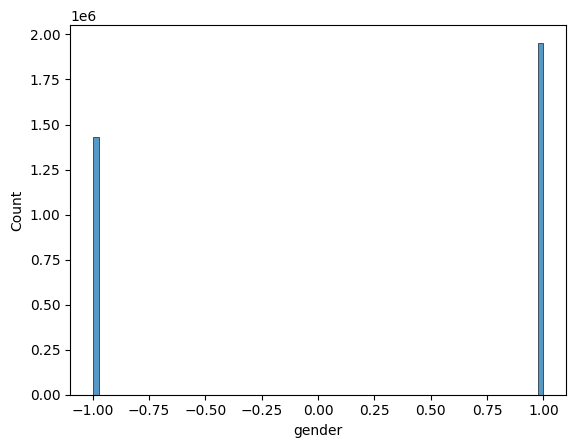

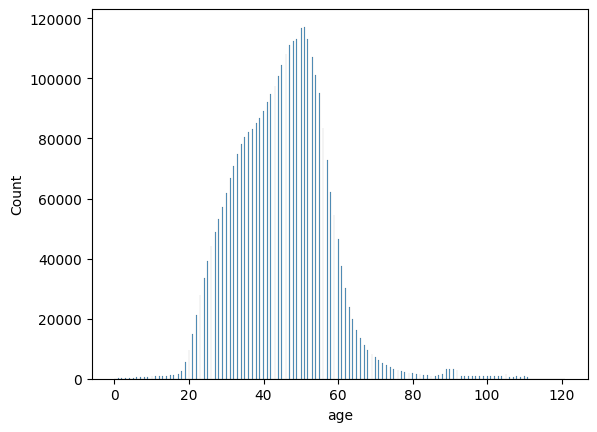

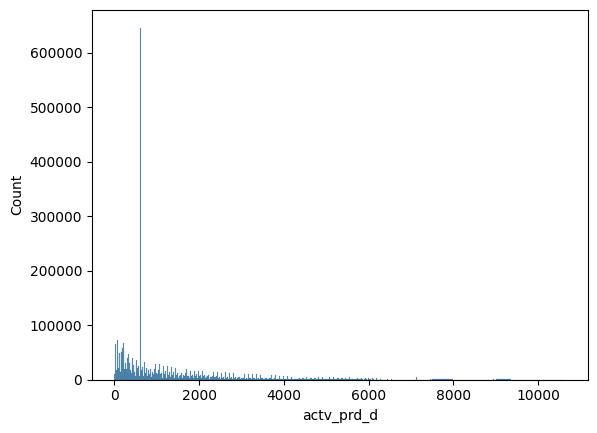

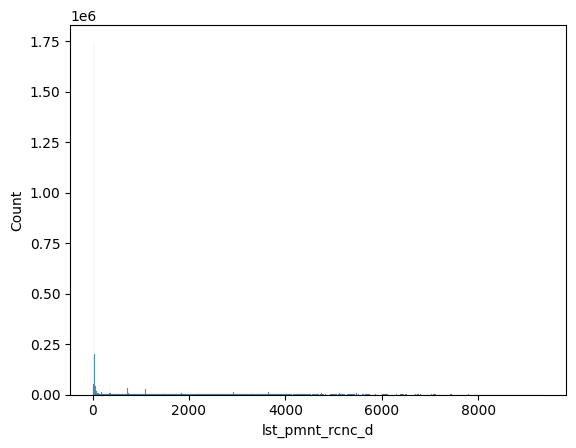

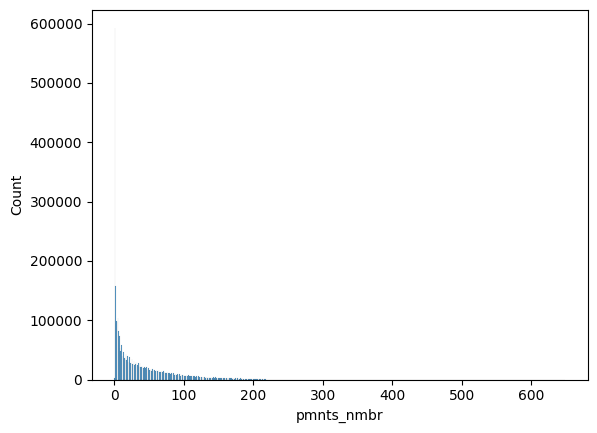

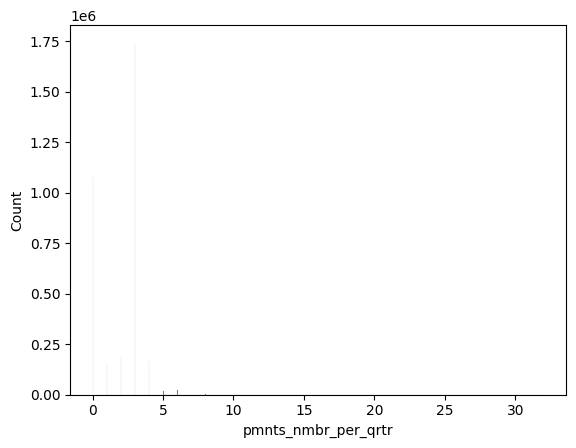

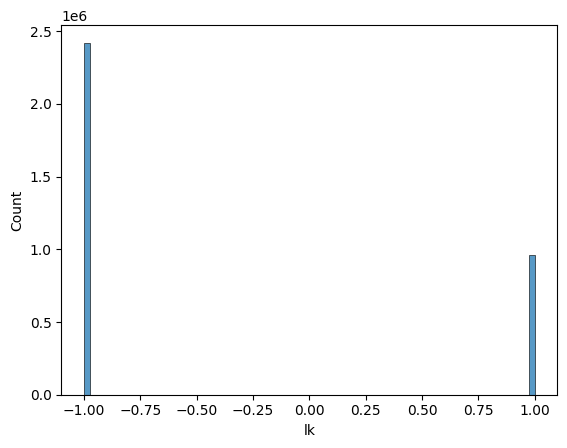

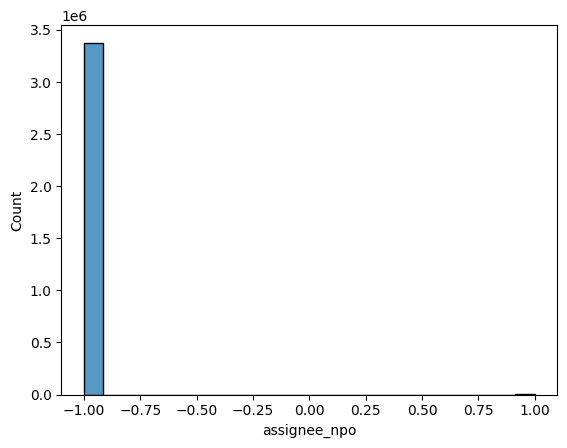

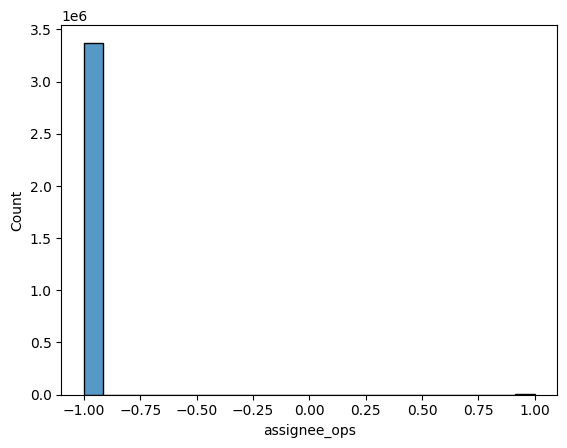

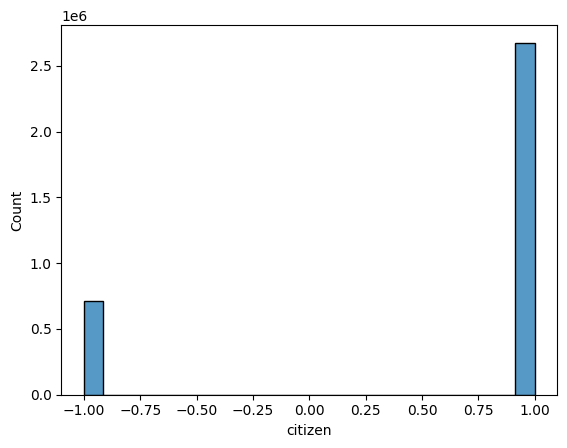

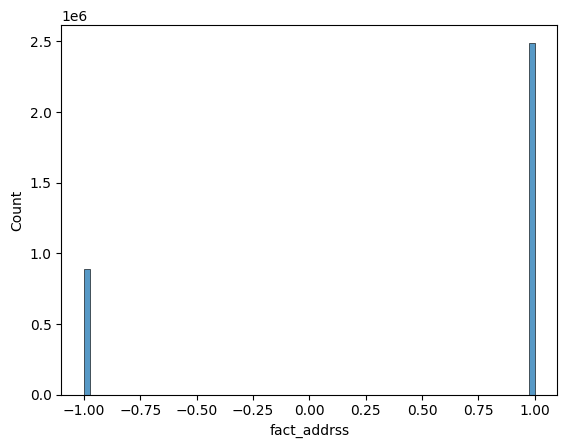

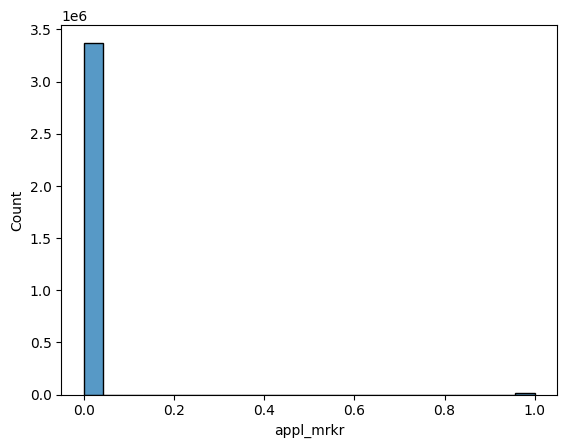

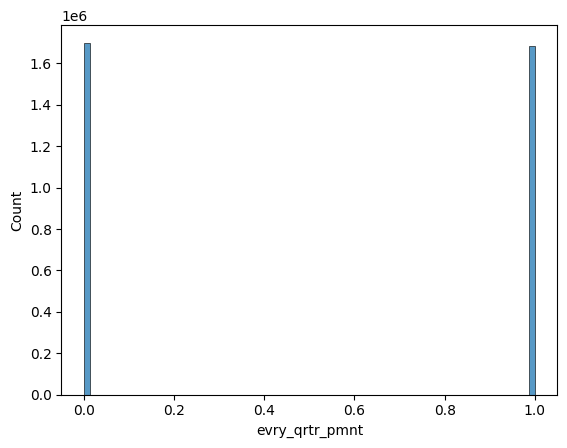

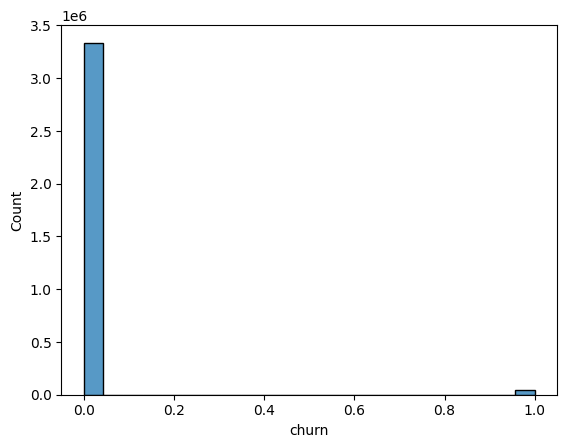

In [22]:
for col in int_cols:
    sns.histplot(train_df[col])
    plt.show()

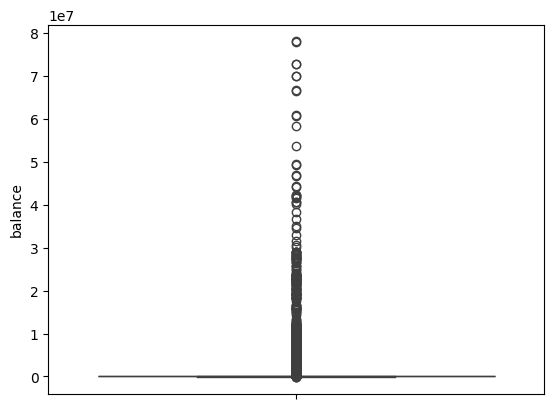

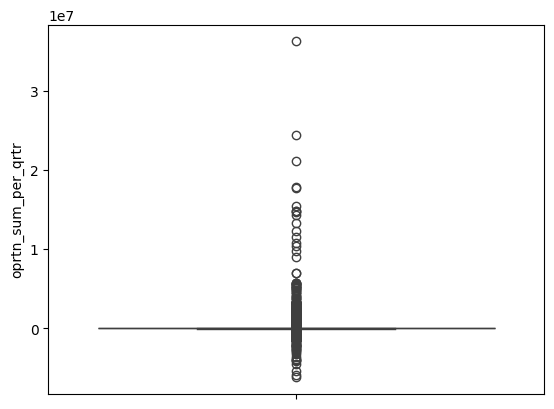

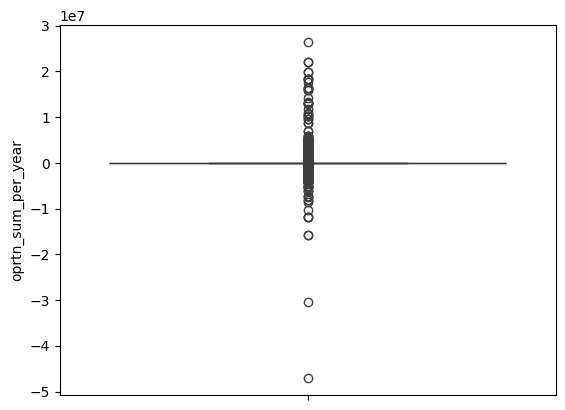

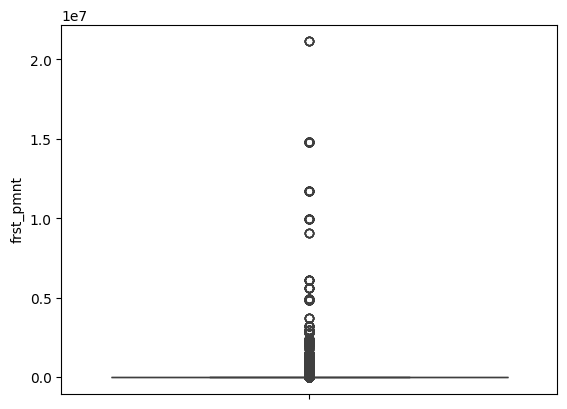

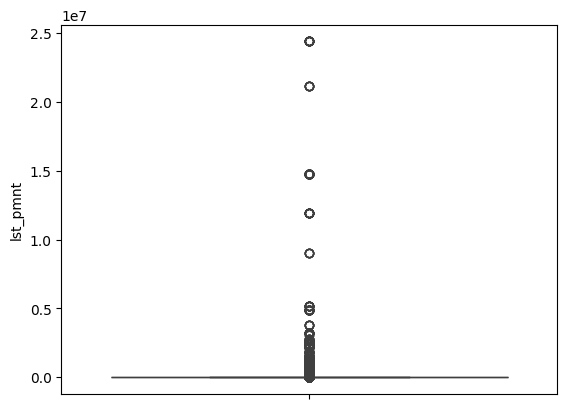

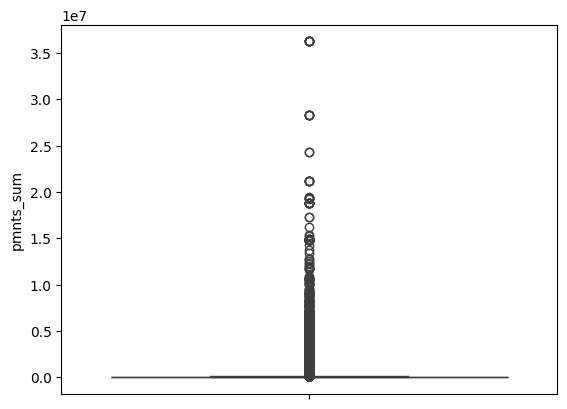

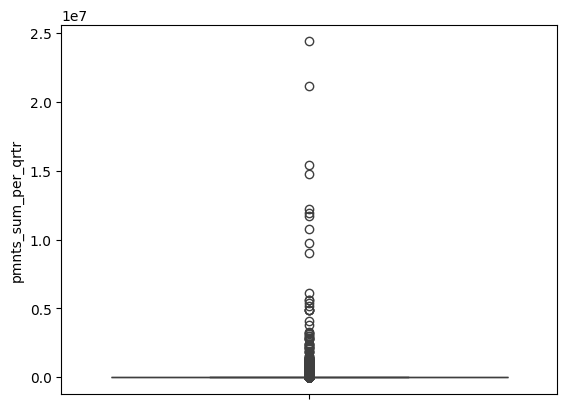

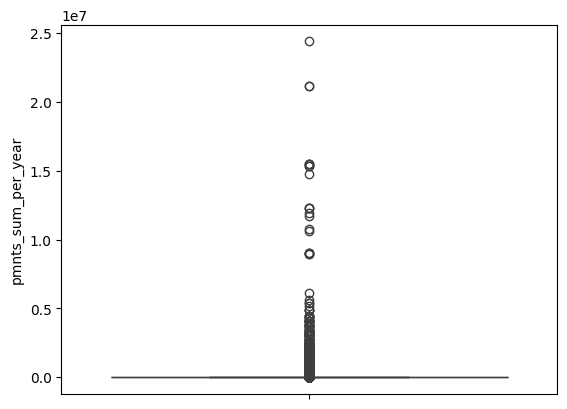

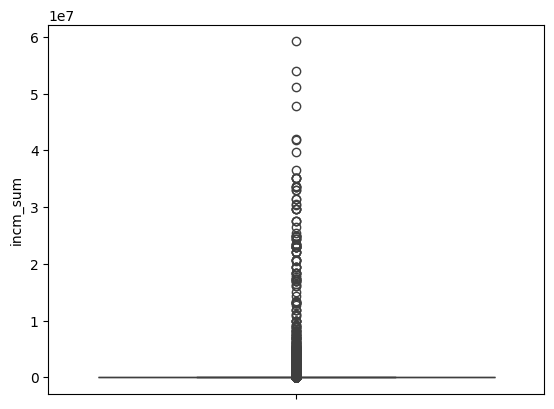

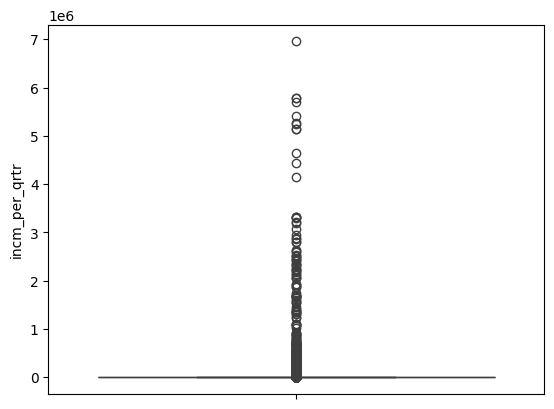

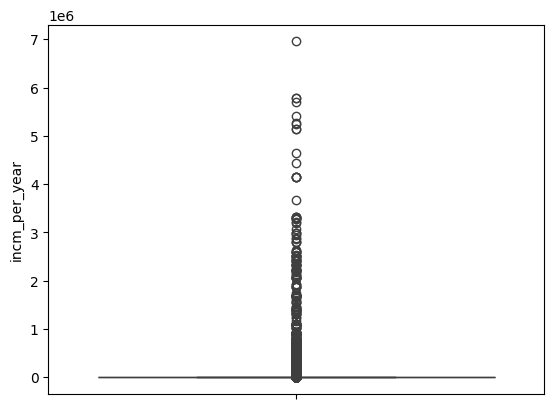

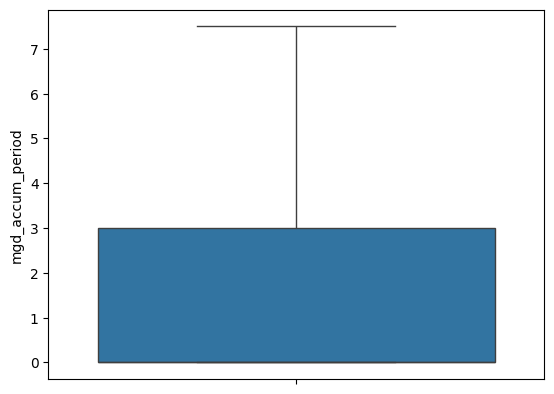

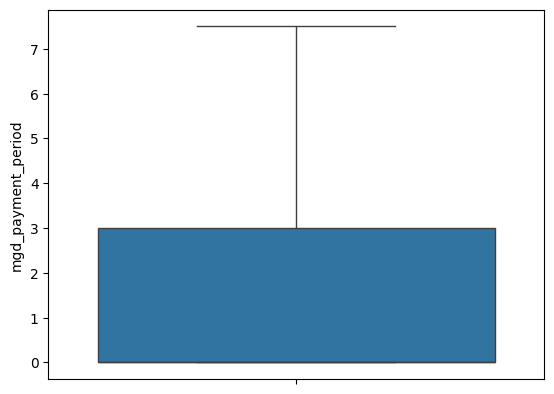

In [28]:
for col in float_cols:
    sns.boxplot(train_df[col])
    plt.show()

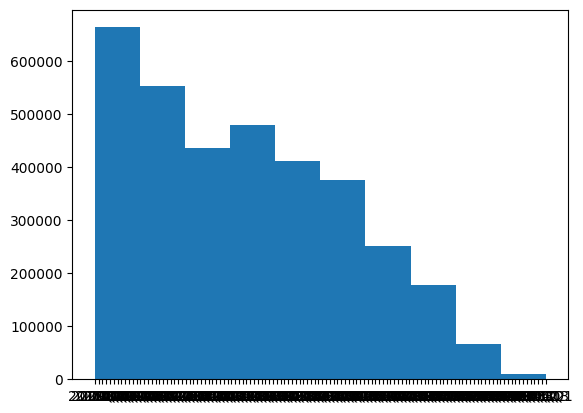

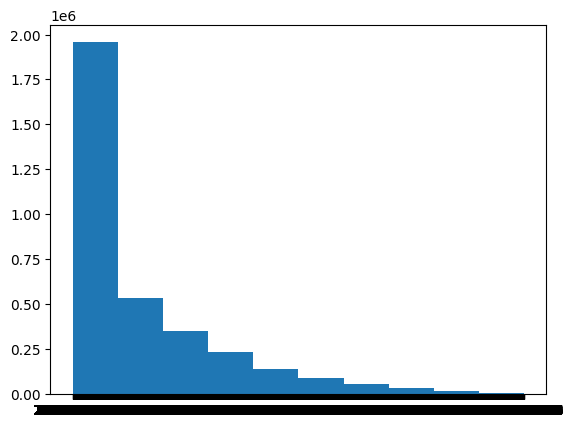

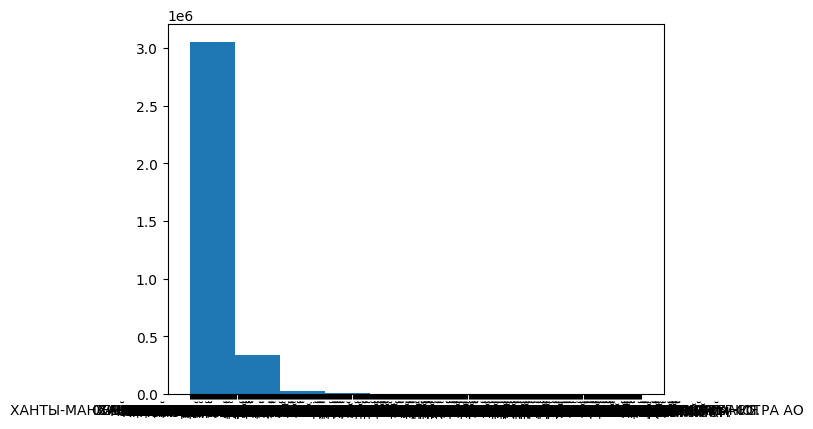

In [44]:
for col in cat_cols:
    plt.hist(train_df[col])
    plt.show()

Матрица корреляции

<Axes: >

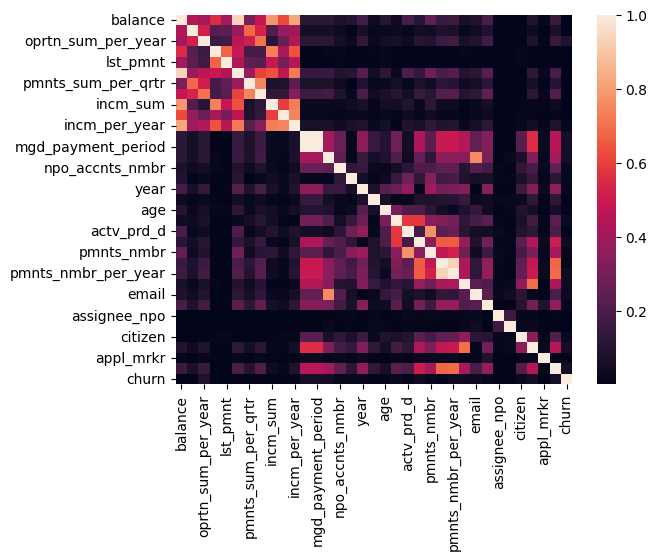

In [34]:
sns.heatmap(np.abs(train_df[float_cols + int_cols].corr()))